# I. Xem trước bộ dữ liệu

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from utils import algorithm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)

Đọc file và in ra 05 hàng đầu tiên

In [4]:
data_path = "breast_cancer.csv"
raw = pd.read_csv(data_path)
raw.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave_points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave_points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

### Danh sách các thuộc tính
Điền thông tin vào đây

In [5]:
col = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']
raw.columns = col

# Hiển thị: Số hàng và kiểu của các features trong bảng
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Kiểm tra số lượng giá trị không phải kiểu số

In [6]:
raw.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Minh họa trực quan bộ data bằng histogram

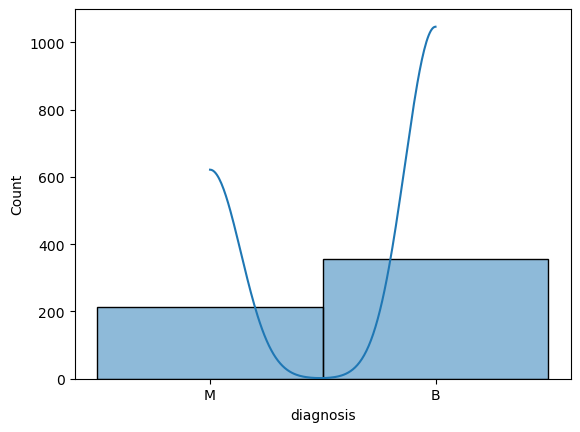

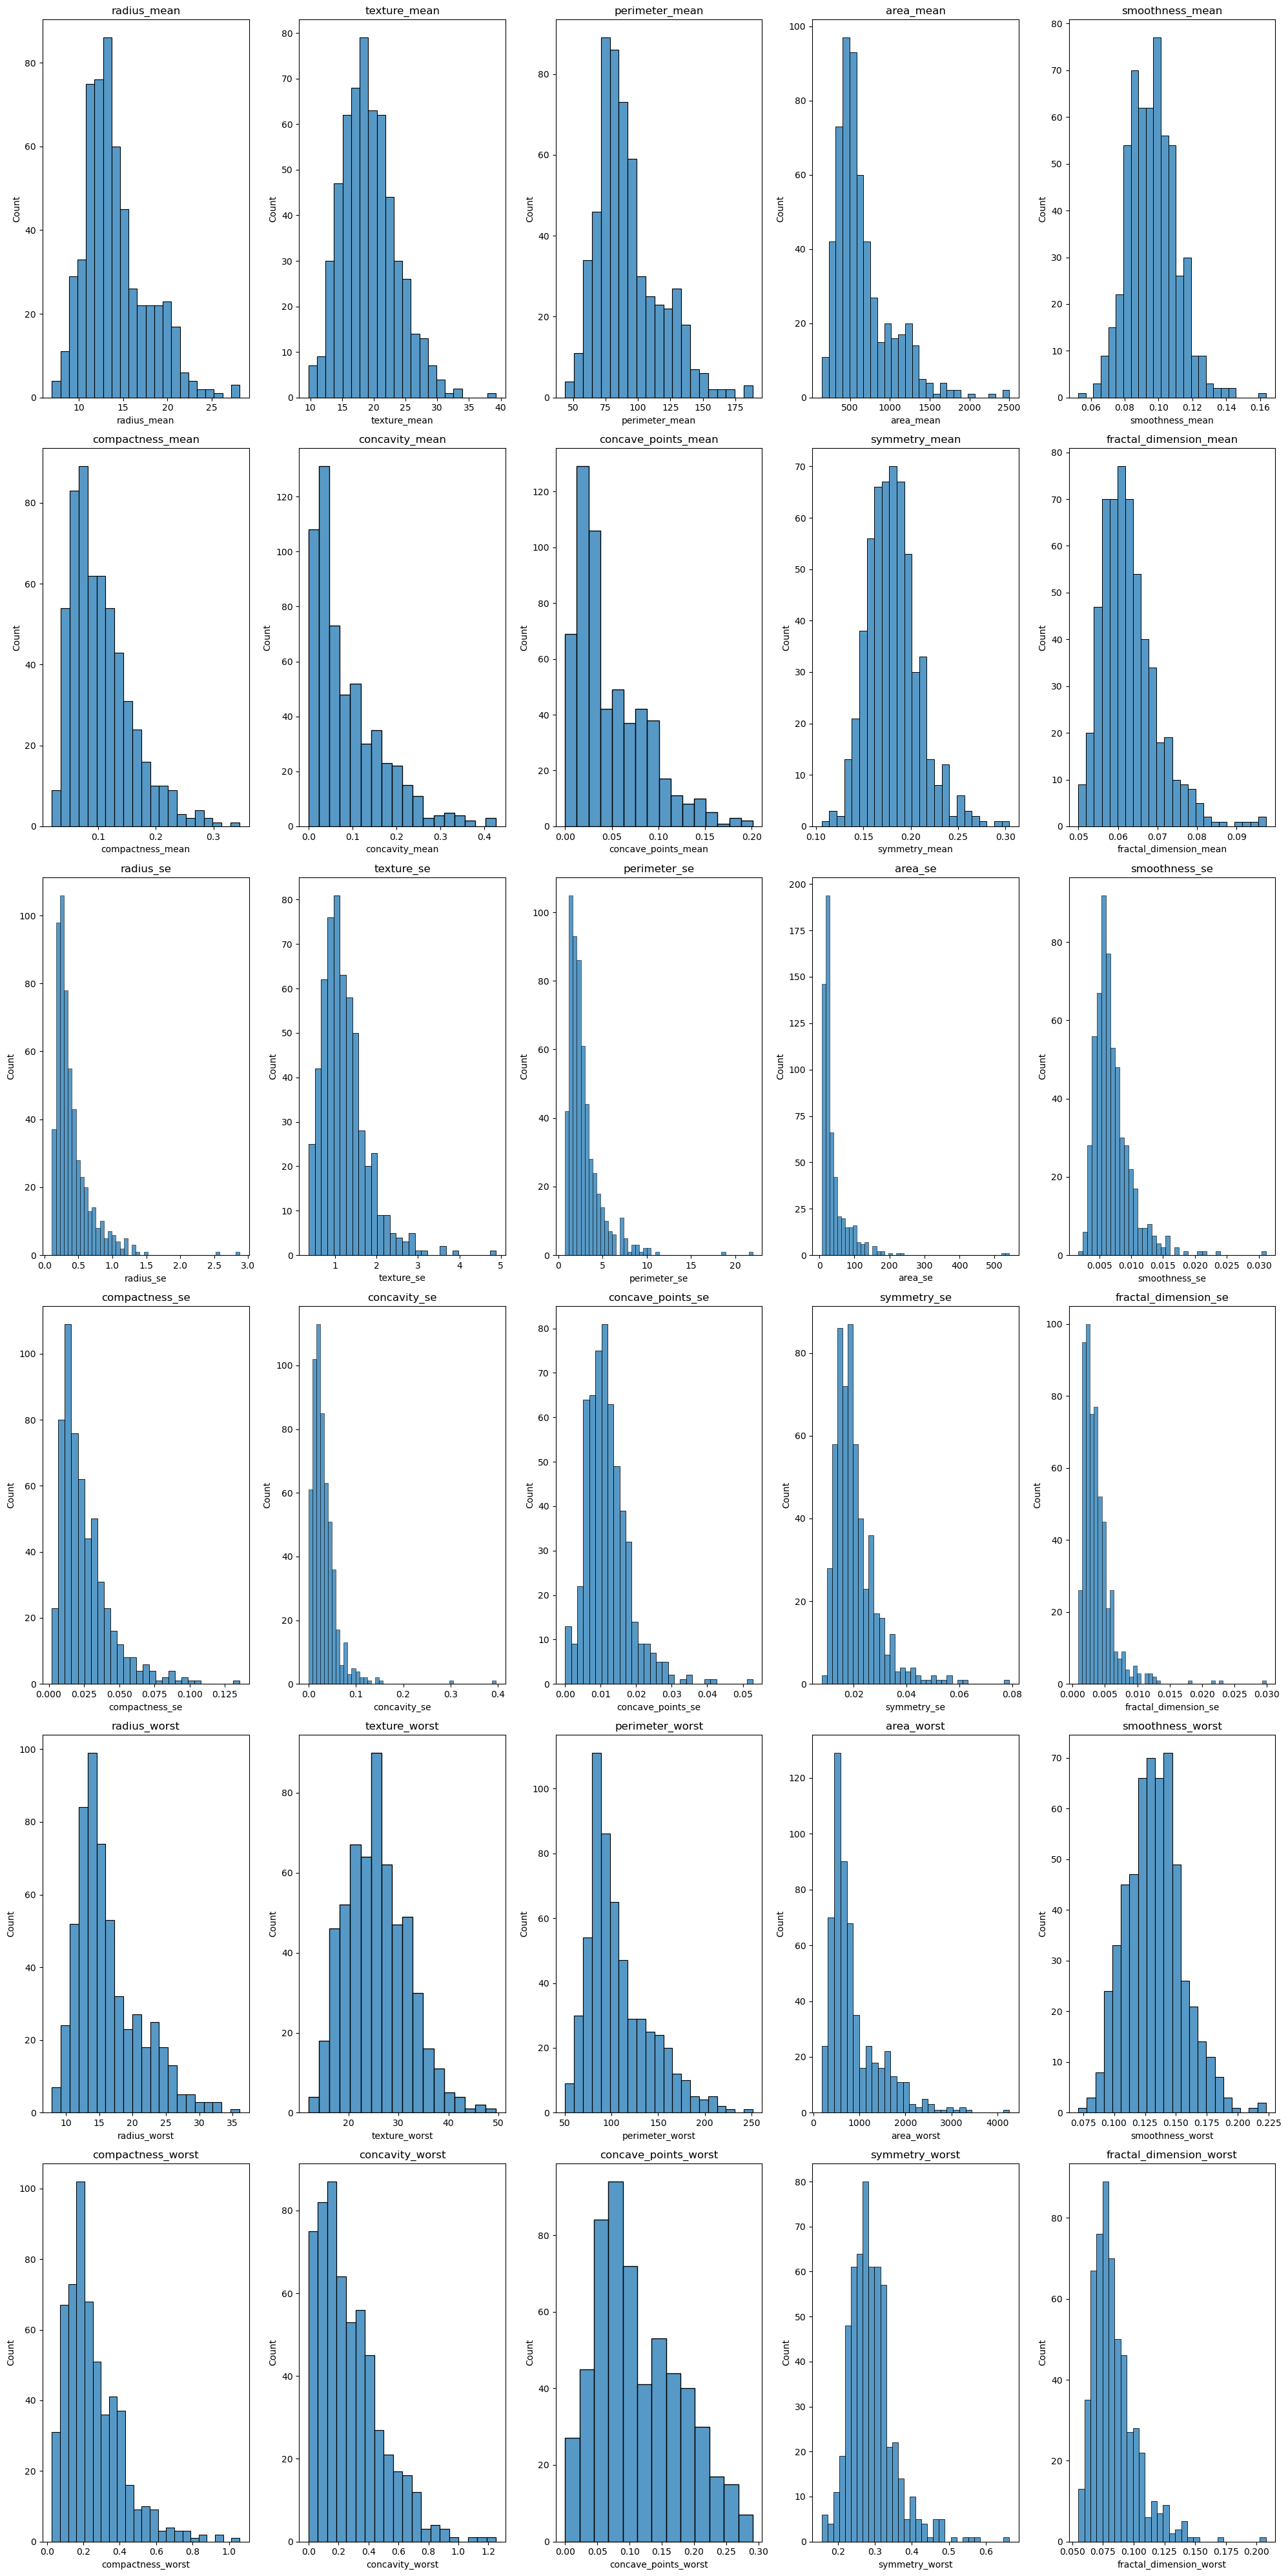

In [7]:
# Minh họa target feature: 'diagnosis'
sns.histplot(raw['diagnosis'], kde='False')

# Minh họa các features còn lại
fig, axes = plt.subplots(6, 5, figsize=(20, 40))
features = raw.columns[-30:]
for i, feature in enumerate(features):
    row = i // 5
    col = i % 5
    sns.histplot(data=raw, x=feature, ax=axes[row, col], kde=False)
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

## II. Chuẩn hóa dữ liệu


Dựa vào bảng xem trước, ta chia các cột thành các nhóm như sau:

In [8]:
drop_cols = [col for col in ['id']] # Cột 'id' không có ý nghĩa trong quá trình học máy
target_col = 'diagnosis'
num_cols = [col for col in raw.columns if col not in drop_cols + [target_col]]
cat_cols = []

### Pipeline cho tiền xử lý

In [9]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

### Tiền xử lý dữ liệu

In [10]:
X = raw.drop(drop_cols + [target_col], axis=1)
y = raw[target_col].map({'M':1,'B':0})

X = preprocessor.fit_transform(X)
df = pd.DataFrame(X, columns=num_cols, index=raw.index)

# gắn nhãn nếu có
if y is not None:
    df[target_col] = y.values

df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se   area_se  \
0                2.255747   2.489734   -0.565265      2.833031  2.487578   
1               -0.868652   0.499255   -0.876244      0.263327  0.742402   
2               -0.398008   1.228676   -0.780083      0.850928  1.181336   
3                4.910919   0.326373   -0.110409      0.286593 -0.288378   
4               -0.562450   1.270543   -0.790244      1.273189  1.190357   

   smoothness_se  compactness_se  concavity_se  concave_points_se  \
0      -0.214002        1.316862      0.724026           0.660820   
1      -0.605351       -0.692926     -0.440780           0.260162   
2      -0.297005        0.814974      0.213076           1.424827   
3       0.689702        2.744280      0.819518           1.115007   
4       1.483067       -0.048520      0.828471           1.144205   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0     1.148757              0.907083      1.886690      -1.359293   
1    -0.805450             -0.099444      1.805927      -0.369203   
2     0.237036              0.293559      1.511870      -0.023974   
3     4.732680              2.047511     -0.281464       0.133984   
4    -0.361092              0.499328      1.298575      -1.466770   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0         2.303601    2.001237          1.307686           2.616665   
1         1.535126    1.890489         -0.375612          -0.430444   
2         1.347475    1.456285          0.527407           1.082932   
3        -0.249939   -0.550021          3.394275           3.893397   
4         1.338539    1.220724          0.220556          -0.313395   

   concavity_worst  concave_points_worst  symmetry_worst  \
0         2.109526              2.296076        2.750622   
1        -0.146749              1.087084       -0.243890   
2         0.854974              1.955000        1.152255   
3         1.989588              2.175786        6.046041   
4         0.613179              0.729259       -0.868353   

   fractal_dimension_worst  diagnosis  
0                 1.937015          1  
1                 0.281190          1  
2                 0.201391          1  
3                 4.935010          1  
4                -0.397100          1

Các đặc trưng của dữ liệu sau khi đã được chuẩn hóa:

In [11]:
df.describe()

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        -4.995028e-17   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.927930e+00   

       symmetry_mean  fractal_dimension_mean     radius_se    texture_se  \
count   5.690000e+02            5.690000e+02  5.690000e+02  5.690000e+02   
mean    1.748260e-16            4.745277e-16  2.372638e-16 -1.123881e-16   
std     1.000880e+00            1.000880e+00  1.000880e+00  1.000880e+00   
min    -2.744117e+00           -1.819865e+00 -1.059924e+00 -1.554264e+00   
25%    -7.032397e-01           -7.226392e-01 -6.235706e-01 -6.948092e-01   
50%    -7.162650e-02           -1.782793e-01 -2.922452e-01 -1.974976e-01   
75%     5.307792e-01            4.709834e-01  2.660996e-01  4.665523e-01   
max     4.484751e+00            4.910919e+00  8.906909e+00  6.655279e+00   

       perimeter_se       area_se  smoothness_se  compactness_se  \
count  5.690000e+02  5.690000e+02   5.690000e+02    5.690000e+02   
mean  -1.123881e-16 -1.311195e-16  -1.529727e-16    1.748260e-16   
std    1.000880e+00  1.000880e+00   1.000880e+00    1.000880e+00   
min   -1.044049e+00 -7.378291e-01  -1.776065e+00   -1.298098e+00   
25%   -6.237679e-01 -4.947542e-01  -6.240183e-01   -6.929263e-01   
50%   -2.866520e-01 -3.477828e-01  -2.203352e-01   -2.810204e-01   
75%    2.430307e-01  1.067726e-01   3.683553e-01    3.896541e-01   
max    9.461986e+00  1.104184e+01   8.029999e+00    6.143482e+00   

       concavity_se  concave_points_se   symmetry_se  fractal_dimension_se  \
count  5.690000e+02         569.000000  5.690000e+02          5.690000e+02   
mean   1.623384e-16           0.000000  8.741299e-17         -6.243785e-18   
std    1.000880e+00           1.000880  1.000880e+00          1.000880e+00   
min   -1.057501e+00          -1.913447 -1.532890e+00         -1.096968e+00   
25%   -5.571612e-01          -0.674490 -6.516807e-01         -5.851185e-01   
50%   -1.990654e-01          -0.140496 -2.194304e-01         -2.299405e-01   
75%    3.367521e-01           0.472657  3.556925e-01          2.886421e-01   
max    1.207268e+01           6.649601  7.071917e+00          9.851593e+00   

       radius_worst  texture_worst  perimeter_worst  area_worst  \
count  5.690000e+02   5.690000e+02     5.690000e+02  569.000000   
mean  -8.241796e-16   1.248757e-17    -3.746271e-16    0.000000   
std    1.000880e+00   1.000880e+00     1.000880e+00    1.000880   
min   -1.726901e+00  -2.223994e+00    -1.693361e+00   -1.222423   
25%   -6.749213e-01  -7.486293e-01    -6.895783e-01   -0.642136   
50%   -2.690395e-01  -4.351564e-02    -2.859802e-01   -0.341181   
75%    5.220158e-01   6.583411e-01     5.402790e-01    0.357589   
max    4.094189e+00   3.885905e+00     4.287337e+00    5.930172   

       smoothness_worst  compactness_worst  concavity_worst  \
count 

### Ma trận tương quan

<Axes: >

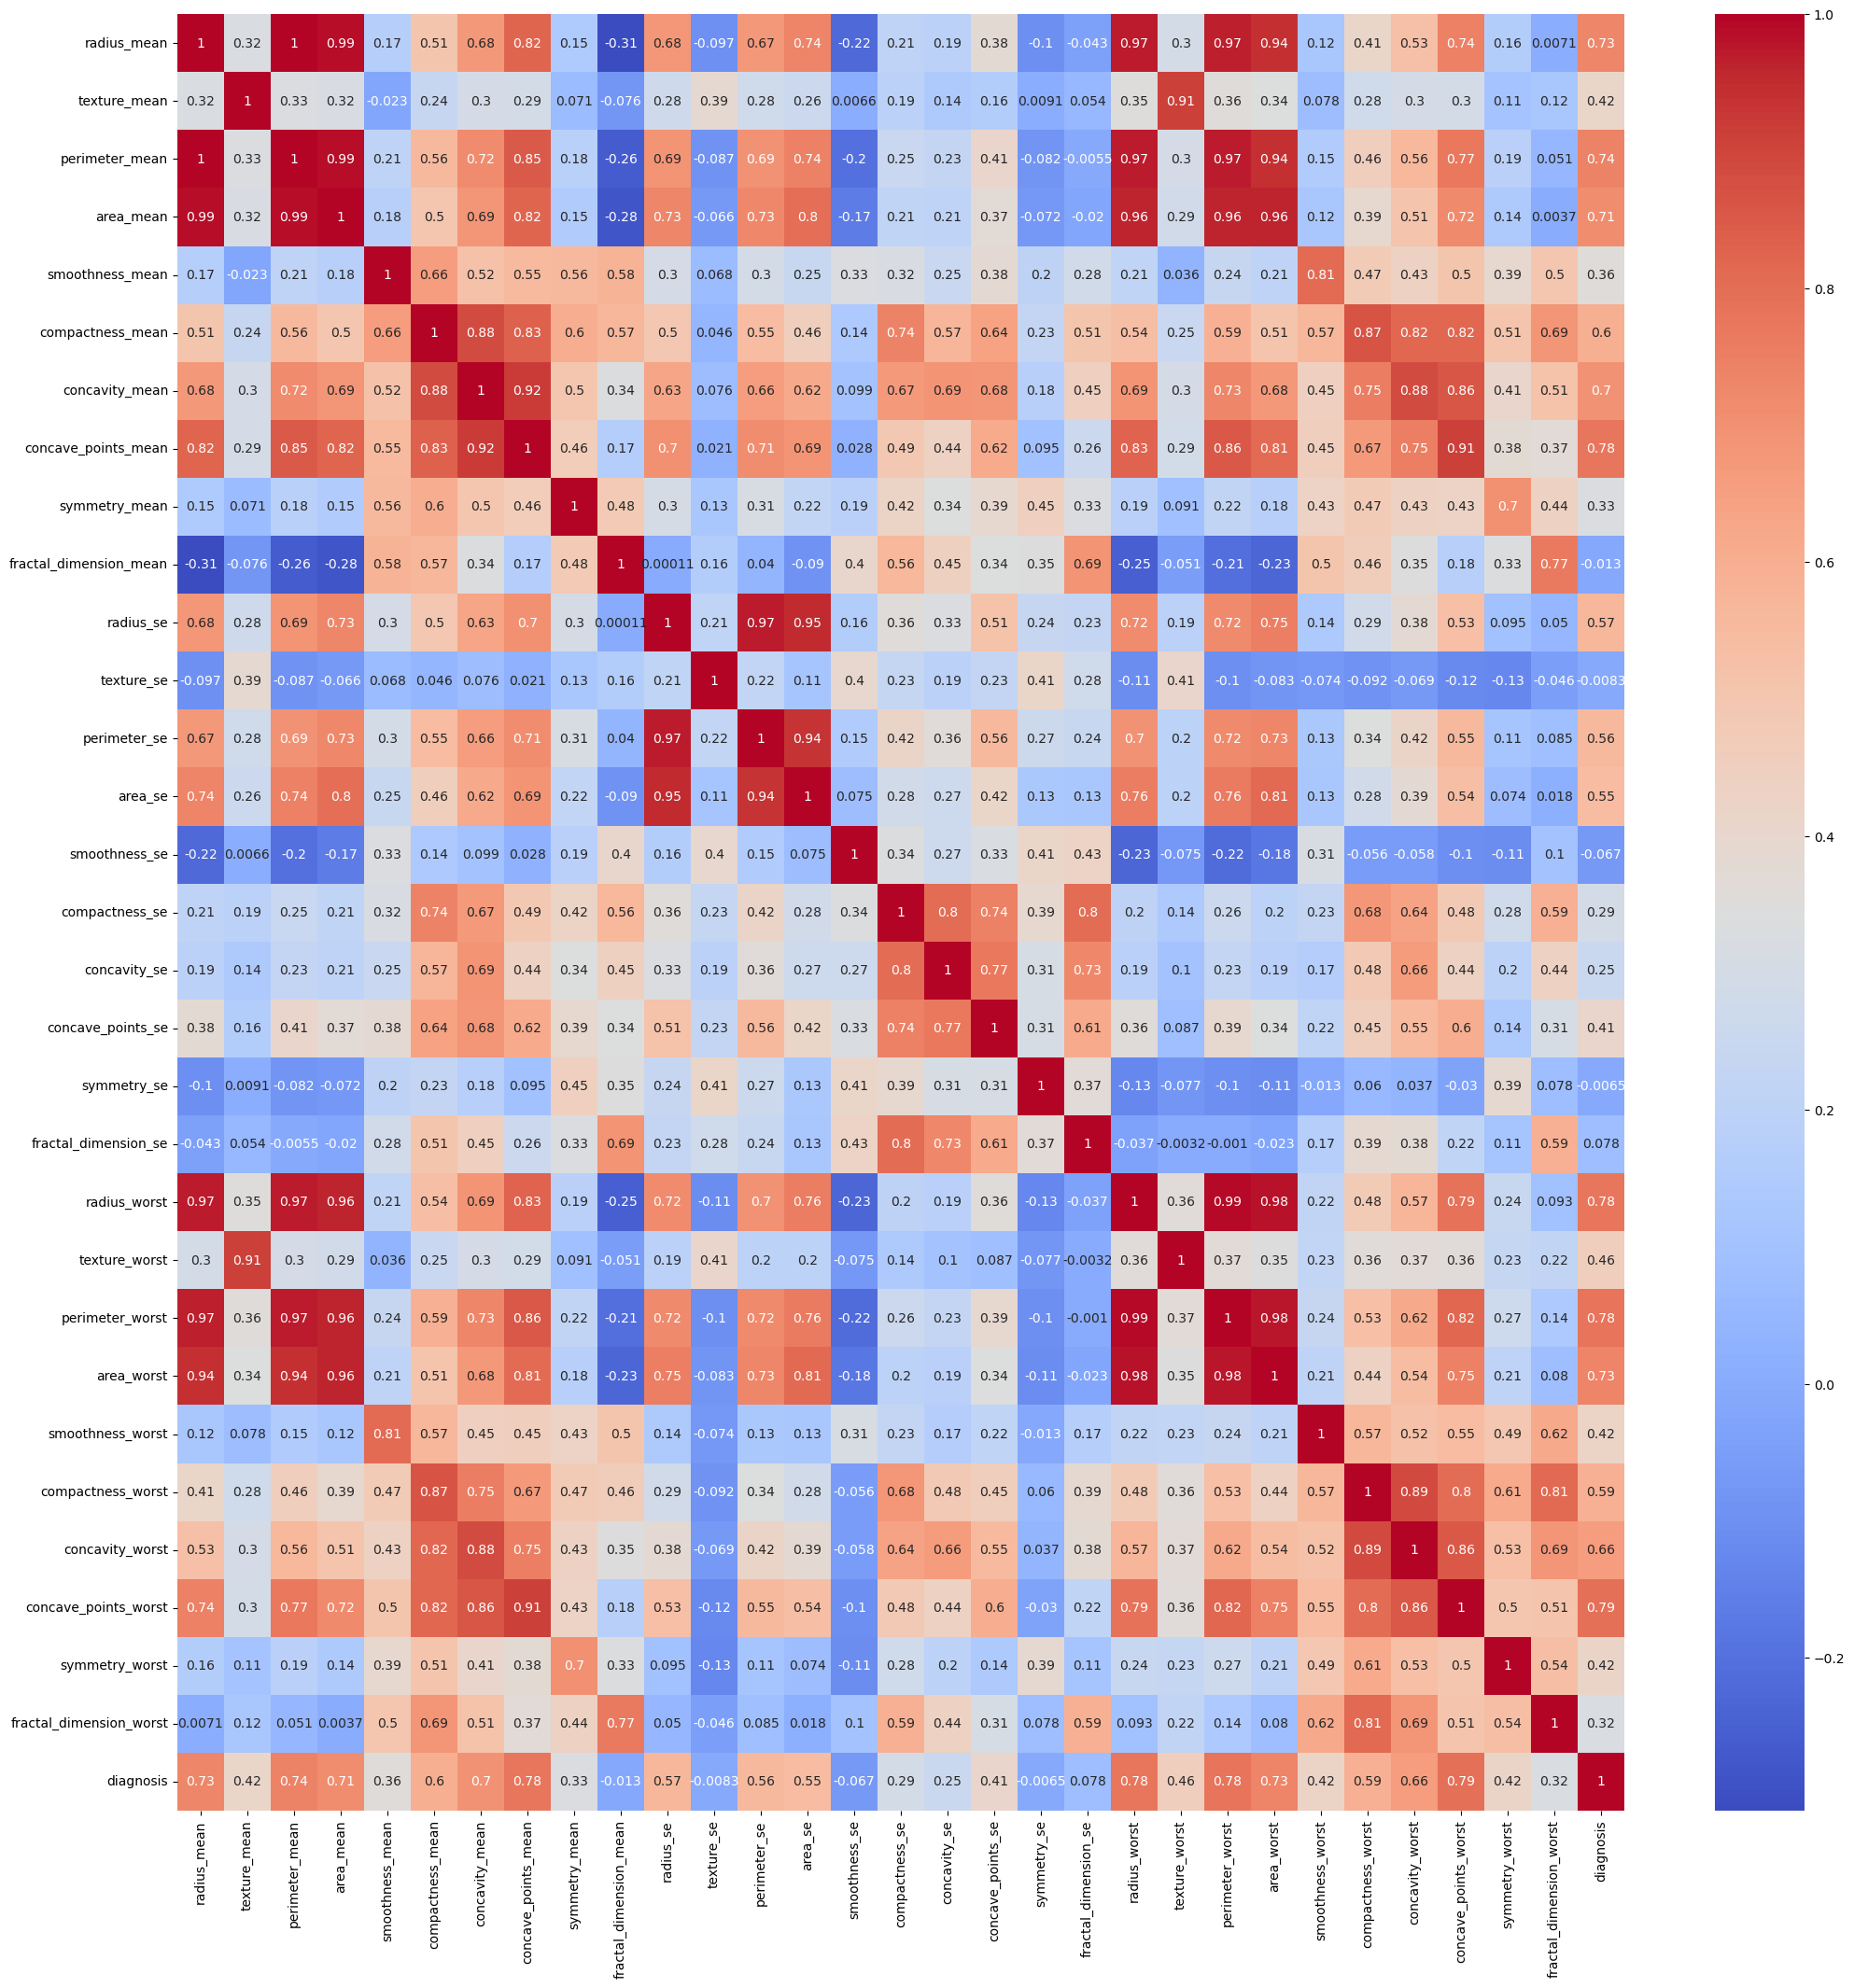

In [12]:
correlation = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Chọn ra những features có correlation cao (trị tuyệt đối > 0.75) đối với target.

--- PHẦN 1: Lọc theo tương quan với 'diagnosis' ---
Tìm thấy 15 features có tương quan > 0.5 với 'diagnosis':
['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst']




<Figure size 1000x800 with 0 Axes>

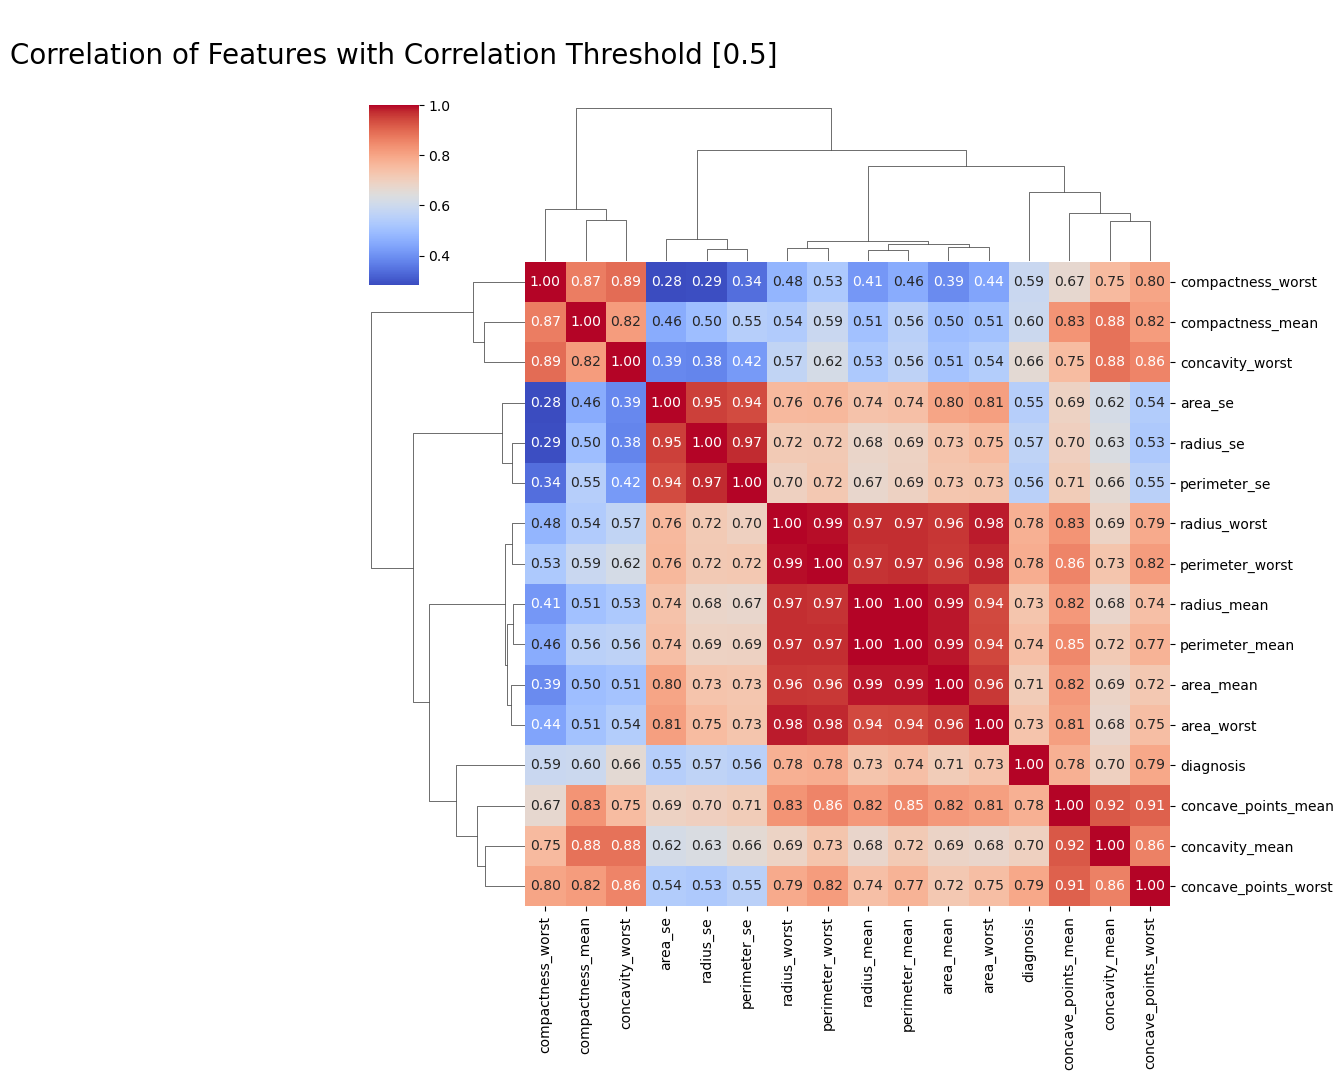

In [18]:
print("--- PHẦN 1: Lọc theo tương quan với 'diagnosis' ---")
threshold = 0.5
target_corr = correlation['diagnosis']
filter = np.abs(correlation["diagnosis"] > threshold)
features_step_1 = target_corr[filter].index.tolist()
if 'diagnosis' in features_step_1:
    features_step_1.remove('diagnosis')

print(f"Tìm thấy {len(features_step_1)} features có tương quan > {threshold} với 'diagnosis':")
print(features_step_1)
print("\n")

correlation_features = correlation.columns[filter].tolist()
plt.figure(figsize=(10,8))
sns.clustermap(df[correlation_features].corr(), annot = True, fmt = ".2f", cmap='coolwarm')
plt.title("\nCorrelation of Features with Correlation Threshold [0.5]\n",fontsize=20)
plt.show()

In [22]:
threshold_multicollinearity = 0.9
corr_step1 = df[features_step_1].corr().abs()
features_to_drop = set()
features_to_keep = list(features_step_1)

# Lặp qua ma trận tam giác trên (upper triangle)
for i in range(len(corr_step1.columns)):
    for j in range(i + 1, len(corr_step1.columns)): 
        col_i = corr_step1.columns[i]
        col_j = corr_step1.columns[j]        
            # Nếu 2 feature này tương quan cao VÀ chưa có feature nào bị drop
        if (corr_step1.loc[col_i, col_j] > threshold_multicollinearity) and (col_i not in features_to_drop) and (col_j not in features_to_drop):
                
                # So sánh xem feature nào có TƯƠNG QUAN VỚI 'diagnosis' YẾU HƠN
                # Chúng ta sẽ DROP feature yếu hơn
                
            corr_with_target_i = target_corr[col_i] # Lấy từ `target_corr` đã tính ở trên
            corr_with_target_j = target_corr[col_j]
                
            if corr_with_target_i < corr_with_target_j:
                features_to_drop.add(col_i)
                print(f"Phát hiện cặp tương quan cao (> {threshold_multicollinearity}): '{col_i}' và '{col_j}'")
                print(f"  -> Quyết định: DROP '{col_i}' (corr với diagnosis: {corr_with_target_i:.2f} < {corr_with_target_j:.2f})")
            else:
                features_to_drop.add(col_j)
                print(f"Phát hiện cặp tương quan cao (> {threshold_multicollinearity}): '{col_i}' và '{col_j}'")
                print(f"  -> Quyết định: DROP '{col_j}' (corr với diagnosis: {corr_with_target_j:.2f} <= {corr_with_target_i:.2f})")

    # Tạo danh sách features cuối cùng
final_features = [f for f in features_step_1 if f not in features_to_drop]

print("\n--- KẾT QUẢ ---")
print(f"Các features đã bị loại bỏ do đa cộng tuyến: {list(features_to_drop)}")
print(f"Danh sách features CUỐI CÙNG ({len(final_features)} features) để huấn luyện mô hình:")
print(final_features)


Phát hiện cặp tương quan cao (> 0.9): 'radius_mean' và 'perimeter_mean'
  -> Quyết định: DROP 'radius_mean' (corr với diagnosis: 0.73 < 0.74)
Phát hiện cặp tương quan cao (> 0.9): 'perimeter_mean' và 'area_mean'
  -> Quyết định: DROP 'area_mean' (corr với diagnosis: 0.71 <= 0.74)
Phát hiện cặp tương quan cao (> 0.9): 'perimeter_mean' và 'radius_worst'
  -> Quyết định: DROP 'perimeter_mean' (corr với diagnosis: 0.74 < 0.78)
Phát hiện cặp tương quan cao (> 0.9): 'concavity_mean' và 'concave_points_mean'
  -> Quyết định: DROP 'concavity_mean' (corr với diagnosis: 0.70 < 0.78)
Phát hiện cặp tương quan cao (> 0.9): 'concave_points_mean' và 'concave_points_worst'
  -> Quyết định: DROP 'concave_points_mean' (corr với diagnosis: 0.78 < 0.79)
Phát hiện cặp tương quan cao (> 0.9): 'radius_se' và 'perimeter_se'
  -> Quyết định: DROP 'perimeter_se' (corr với diagnosis: 0.56 <= 0.57)
Phát hiện cặp tương quan cao (> 0.9): 'radius_se' và 'area_se'
  -> Quyết định: DROP 'area_se' (corr với diagnosis: 


Đang vẽ Clustermap cho các features CUỐI CÙNG (sau khi loại bỏ đa cộng tuyến)...


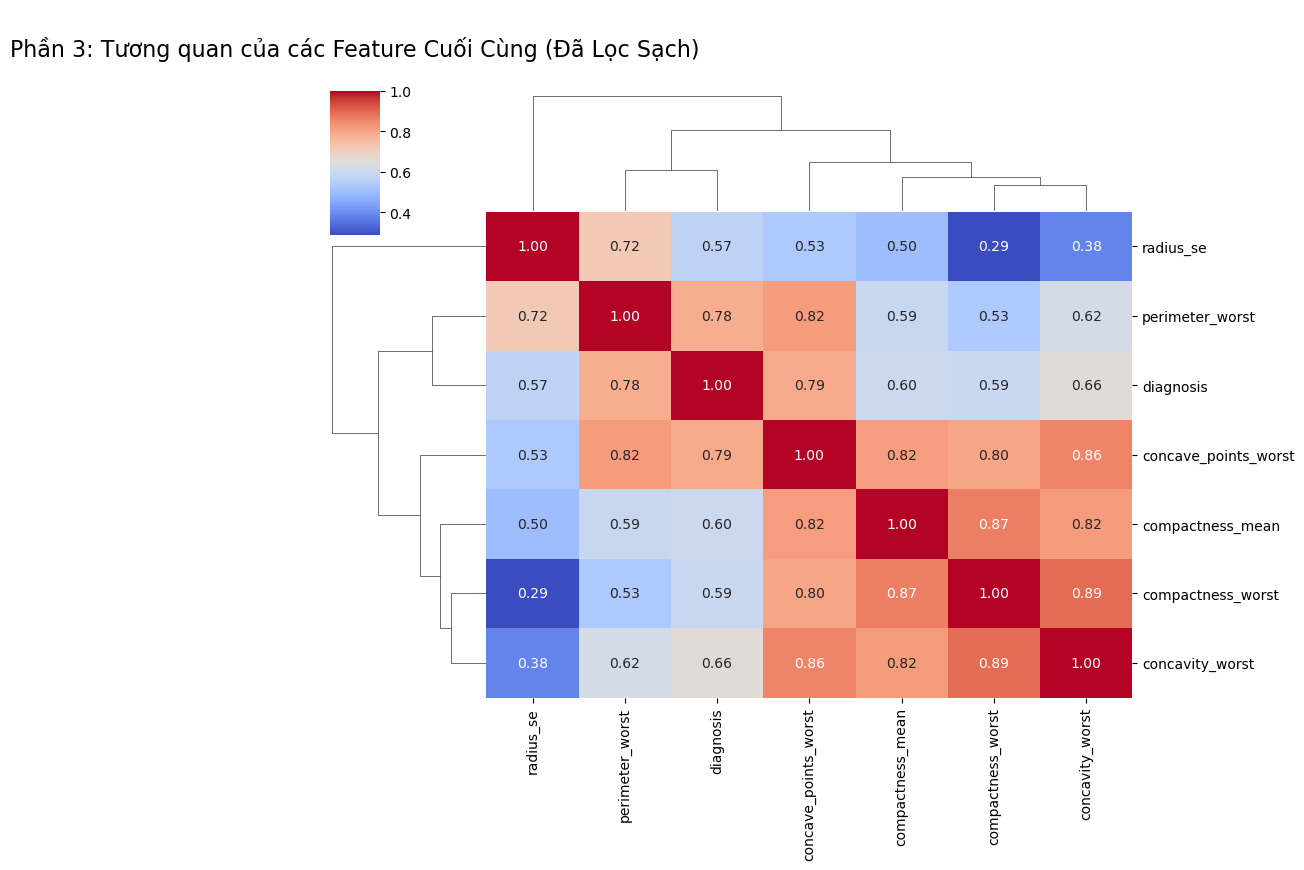

In [25]:
print("\nĐang vẽ Clustermap cho các features CUỐI CÙNG (sau khi loại bỏ đa cộng tuyến)...")
    
    # Thêm 'diagnosis' vào để xem tương quan
final_features_for_plot = final_features + ['diagnosis']
    
if len(final_features_for_plot) > 1:
    sns.clustermap(df[final_features_for_plot].corr(), annot=True, fmt=".2f", cmap='coolwarm', figsize=(10, 8))
    plt.title("\nPhần 3: Tương quan của các Feature Cuối Cùng (Đã Lọc Sạch)\n", fontsize=16)
    plt.show()
else:
    print("Không còn đủ feature để vẽ ma trận tương quan cuối cùng.")


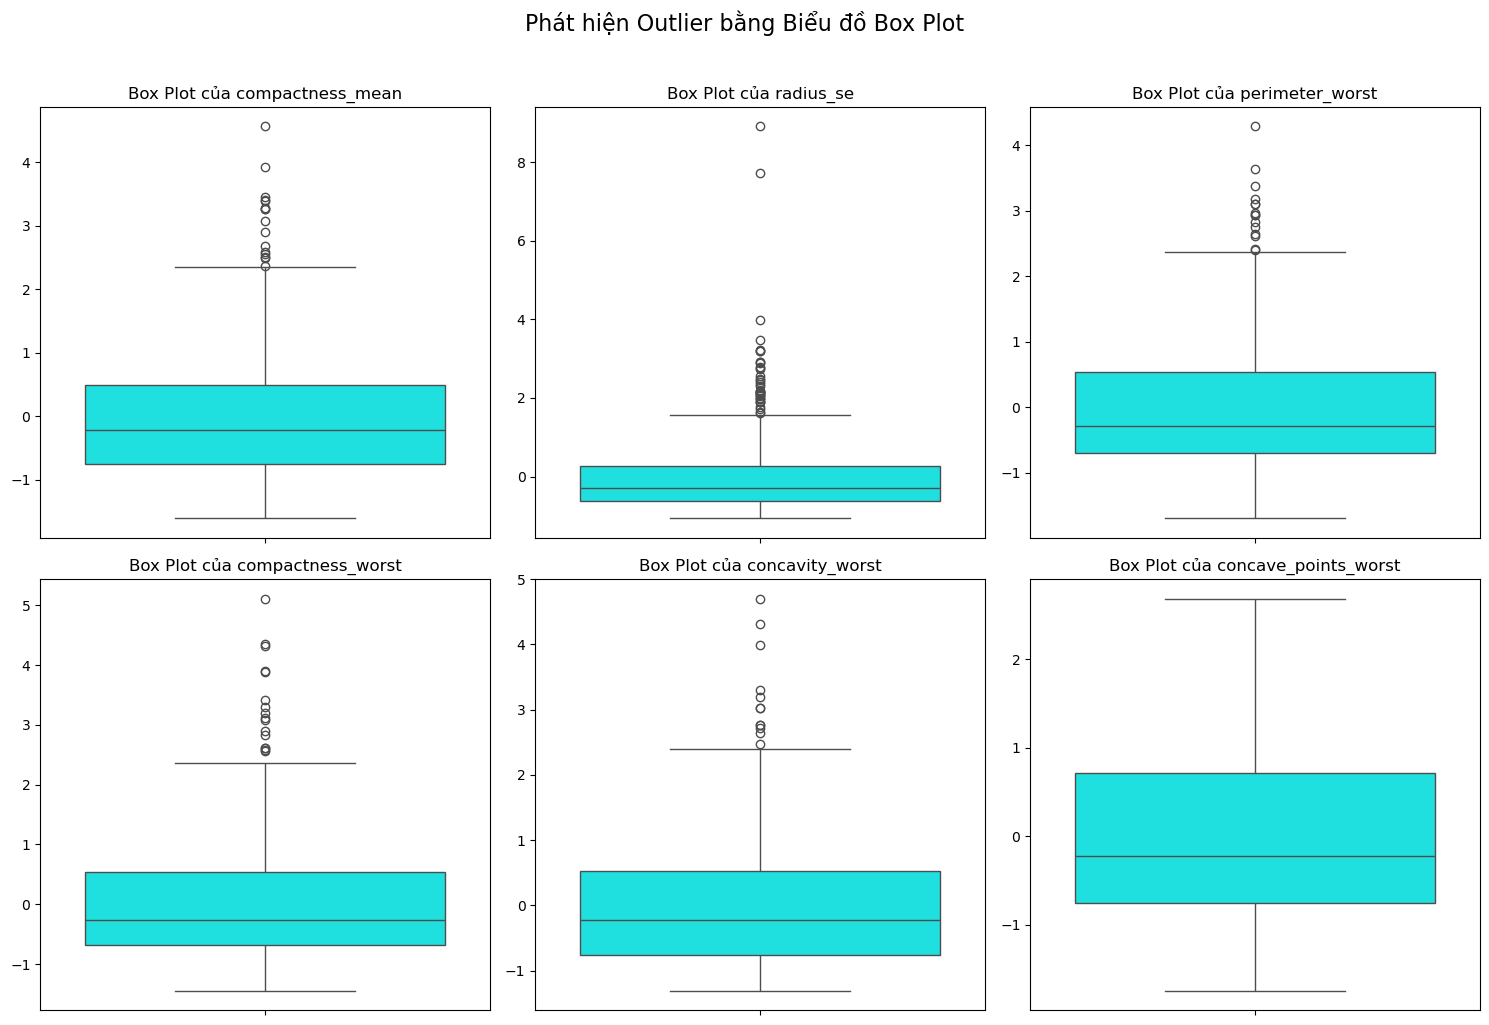

In [26]:
# Giả sử bạn đã có DataFrame 'df' và danh sách 'final_features' từ bước trước
# final_features = ['radius_se', 'perimeter_worst', 'concave_points_worst', 
#                   'compactness_mean', 'compactness_worst', 'concavity_worst']
# (Lấy từ code ở trên)

# --- Vẽ Box Plot cho từng feature ---

# Đặt kích thước biểu đồ
plt.figure(figsize=(15, 10))

# Lặp qua từng feature và vẽ box plot
for i, feature in enumerate(final_features):
    plt.subplot(2, 3, i + 1) # Tạo lưới 2x3
    sns.boxplot(y=df[feature], color='cyan')
    plt.title(f'Box Plot của {feature}', fontsize=12)
    plt.ylabel('')

plt.suptitle('Phát hiện Outlier bằng Biểu đồ Box Plot', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Số lượng hàng ban đầu: 569

Feature: compactness_mean
  - Ngưỡng dưới (1%): -1.3454
  - Ngưỡng trên (99%): 3.2758
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 6 outlier ở phía dưới.

Feature: radius_se
  - Ngưỡng dưới (1%): -1.0302
  - Ngưỡng trên (99%): 3.1983
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 6 outlier ở phía dưới.

Feature: perimeter_worst
  - Ngưỡng dưới (1%): -1.4592
  - Ngưỡng trên (99%): 3.0096
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 6 outlier ở phía dưới.

Feature: compactness_worst
  - Ngưỡng dưới (1%): -1.2988
  - Ngưỡng trên (99%): 3.3358
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 6 outlier ở phía dưới.

Feature: concavity_worst
  - Ngưỡng dưới (1%): -1.3058
  - Ngưỡng trên (99%): 3.0234
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 0 outlier ở phía dưới.

Feature: concave_points_worst
  - Ngưỡng dưới (1%): -1.7451
  - Ngưỡng trên (99%): 2.3542
  - Tìm thấy 6 outlier ở phía trên.
  - Tìm thấy 0 outlier ở phía dưới.

Số lượng hàng sau khi 

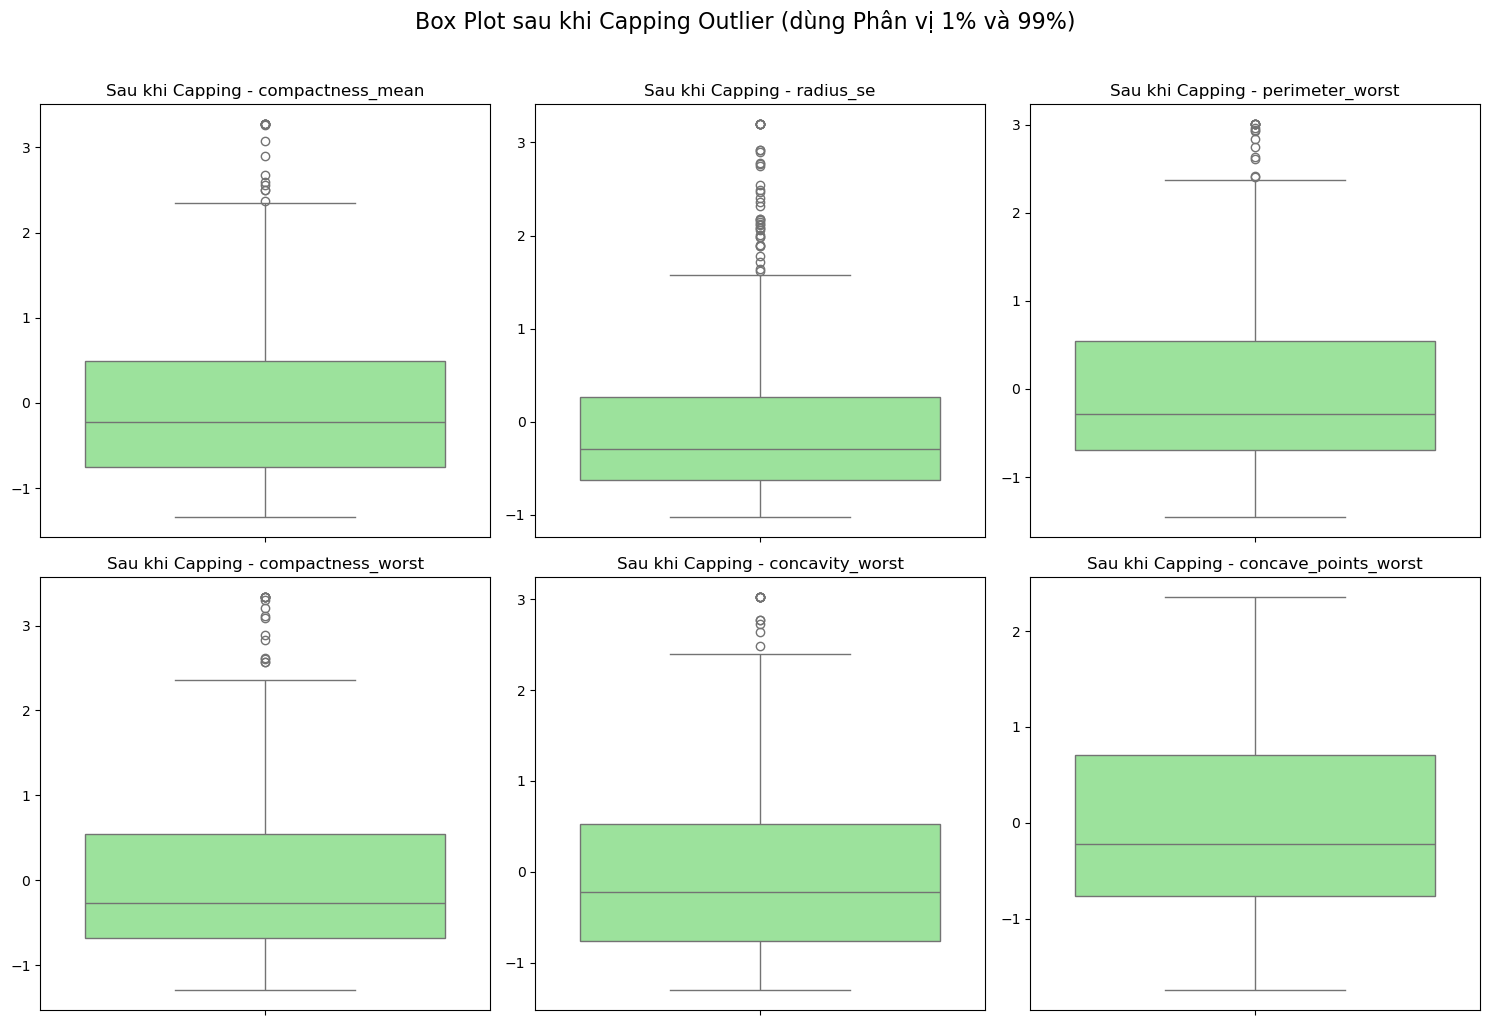

In [30]:
# Giả sử bạn có DataFrame 'df' và danh sách 'final_features'
# final_features = ['radius_se', 'perimeter_worst', 'concave_points_worst', 
#                   'compactness_mean', 'compactness_worst', 'concavity_worst']

print(f"Số lượng hàng ban đầu: {df.shape[0]}")

# Tạo một bản copy để xử lý
df_capped = df.copy()

# Lặp qua từng feature để 'cap' (giới hạn) outlier
for feature in final_features:
    # Tính toán ngưỡng trên (phân vị 99%)
    upper_limit = df_capped[feature].quantile(0.99)
    
    # Tính toán ngưỡng dưới (phân vị 1%)
    lower_limit = df_capped[feature].quantile(0.01)
    
    print(f"\nFeature: {feature}")
    print(f"  - Ngưỡng dưới (1%): {lower_limit:.4f}")
    print(f"  - Ngưỡng trên (99%): {upper_limit:.4f}")
    
    # Lấy số lượng outlier trước khi cap
    outliers_above = (df_capped[feature] > upper_limit).sum()
    outliers_below = (df_capped[feature] < lower_limit).sum()
    print(f"  - Tìm thấy {outliers_above} outlier ở phía trên.")
    print(f"  - Tìm thấy {outliers_below} outlier ở phía dưới.")

    # Thực hiện Capping
    # Thay thế tất cả giá trị > ngưỡng trên BẰNG ngưỡng trên
    df_capped[feature] = np.where(
        df_capped[feature] > upper_limit,  # Điều kiện
        upper_limit,                       # Giá trị nếu True
        df_capped[feature]                 # Giá trị nếu False
    )
    
    # Thay thế tất cả giá trị < ngưỡng dưới BẰNG ngưỡng dưới
    df_capped[feature] = np.where(
        df_capped[feature] < lower_limit,  # Điều kiện
        lower_limit,                       # Giá trị nếu True
        df_capped[feature]                 # Giá trị nếu False
    )

print(f"\nSố lượng hàng sau khi Capping: {df_capped.shape[0]} (không đổi)")

# --- Trực quan hóa để kiểm tra KẾT QUẢ ---
print("\nĐang vẽ Box Plot sau khi đã Capping...")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(final_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_capped[feature], color='lightgreen')
    plt.title(f'Sau khi Capping - {feature}', fontsize=12)
    plt.ylabel('')

plt.suptitle('Box Plot sau khi Capping Outlier (dùng Phân vị 1% và 99%)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

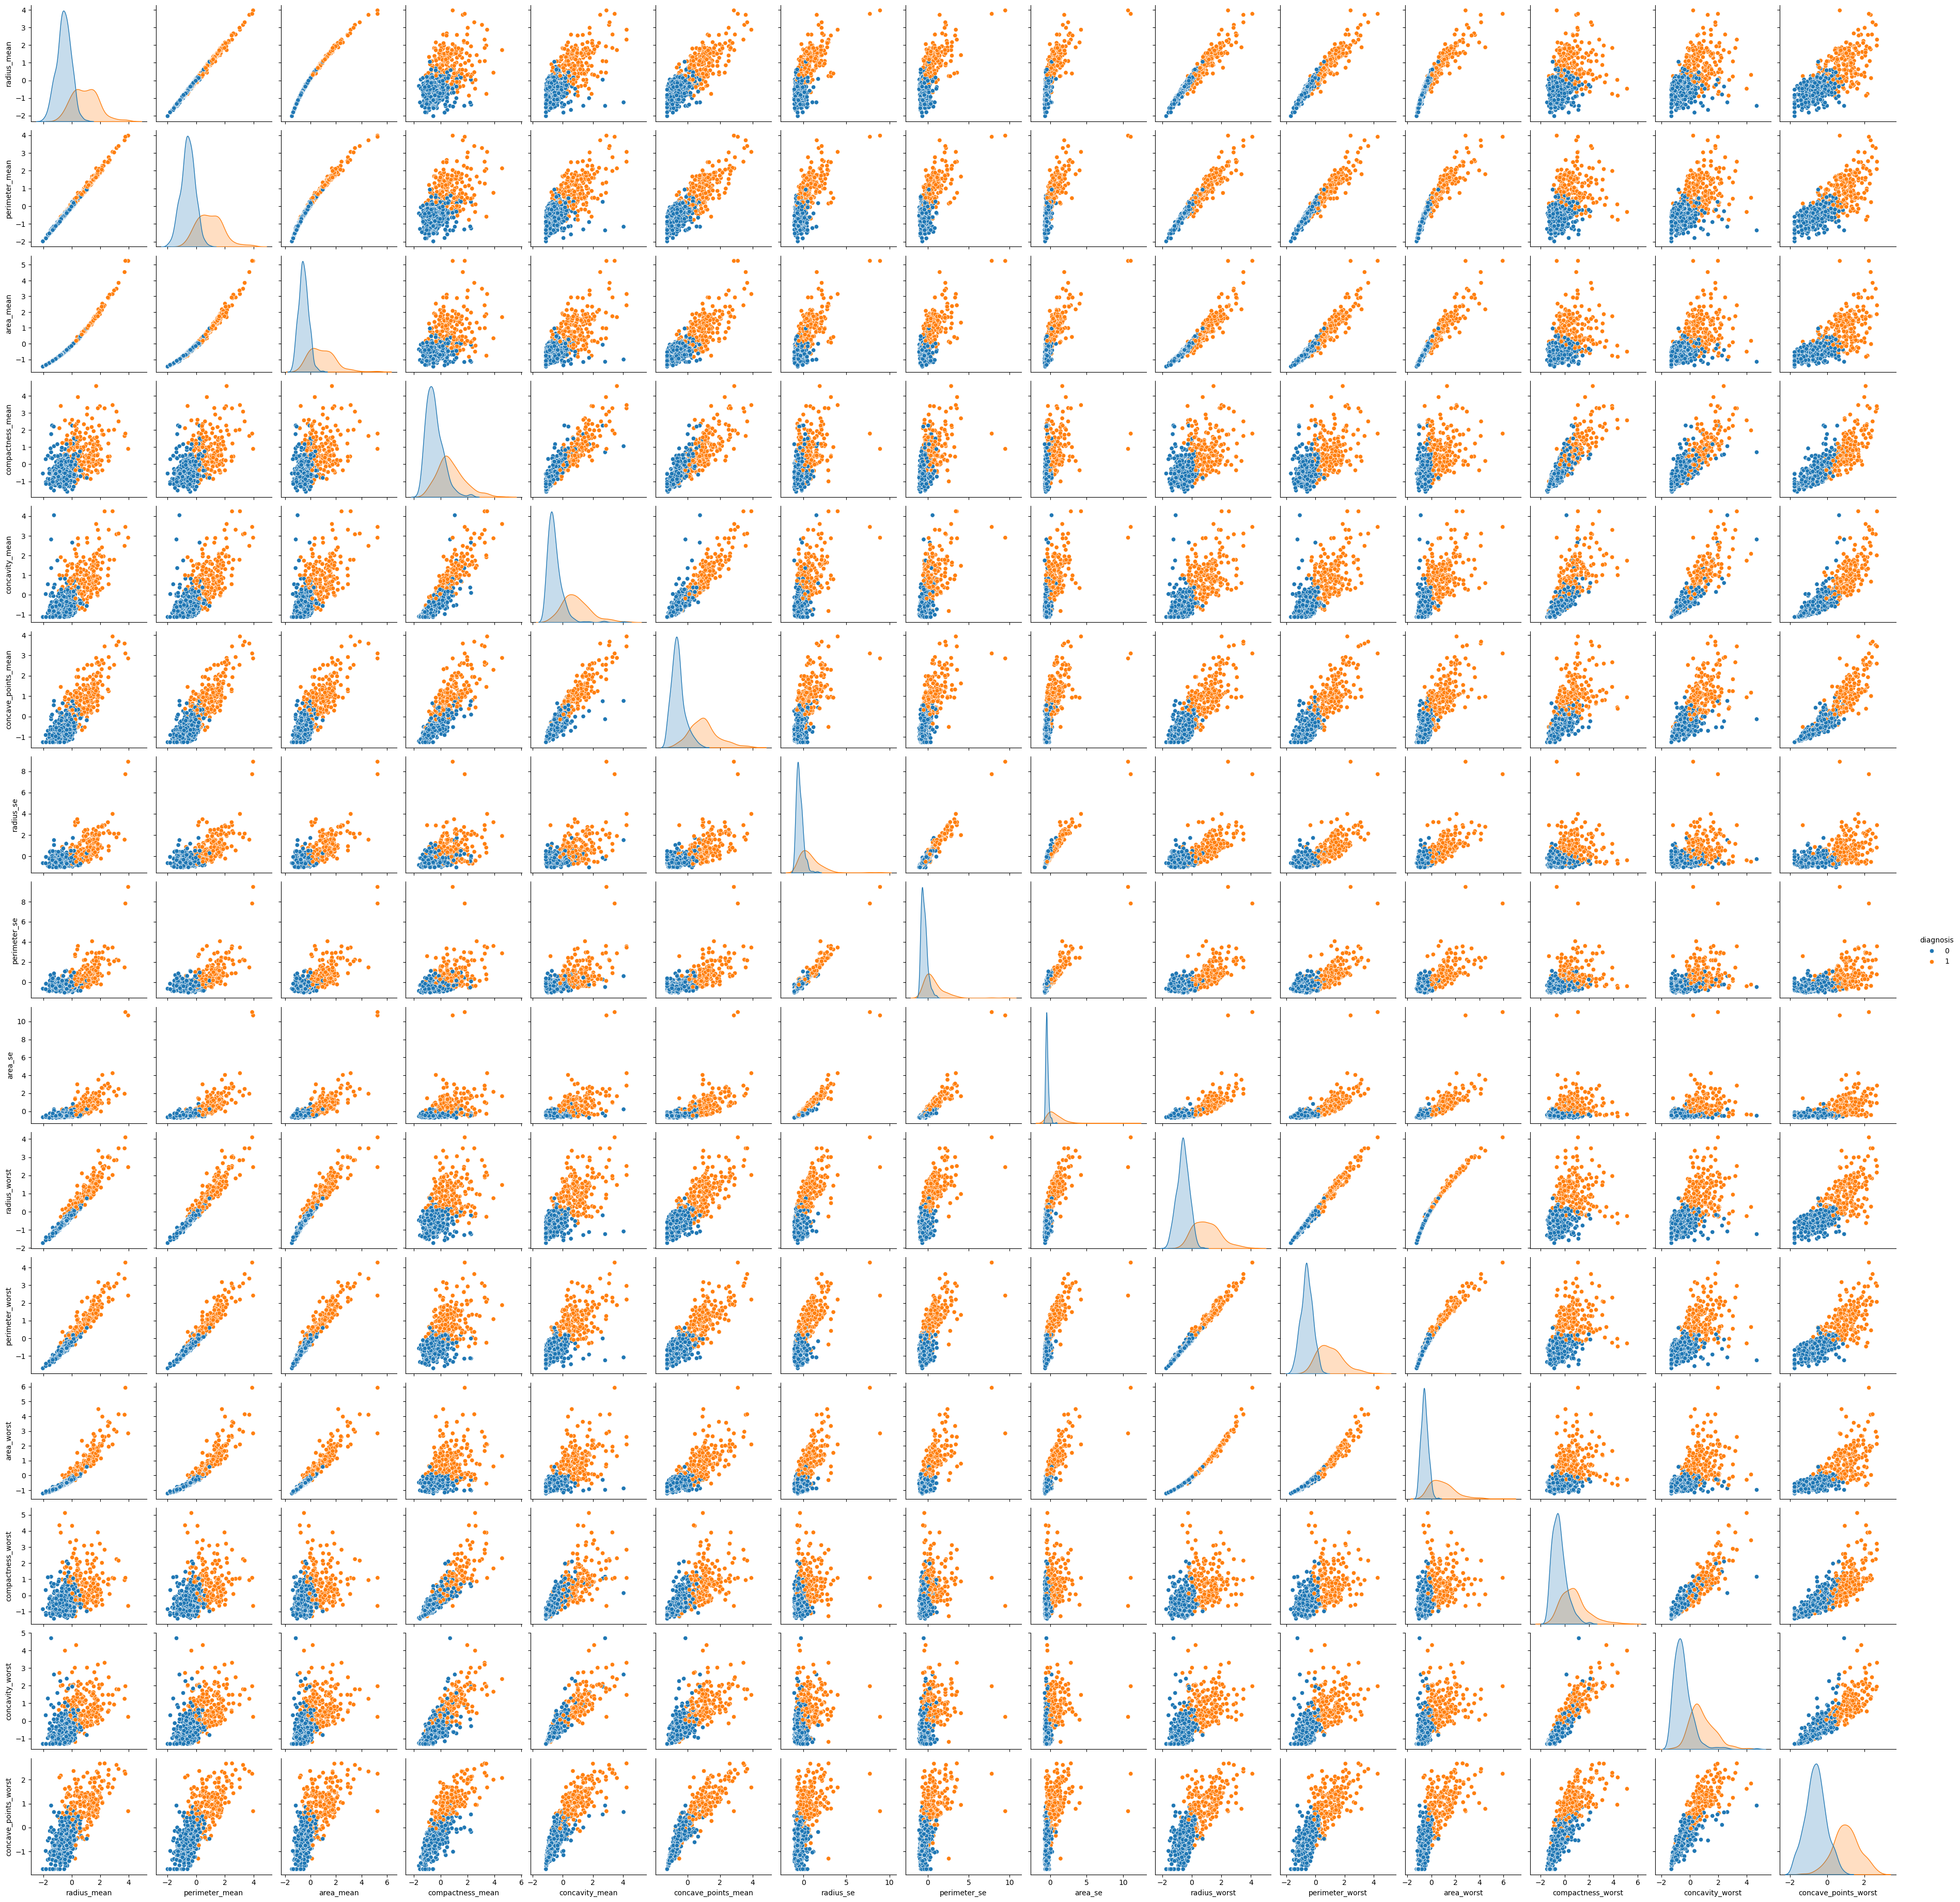

In [31]:
sns.pairplot(df[correlation_features], diag_kind = "kde",  hue="diagnosis")
plt.show()

## III. Chia tập dữ liệu

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
Algorithm = ['KNeighborsClassifier','LogisticRegression', 'SVM', 'Naive Bayes', 'RandomForest', 'VotingClassifier', 'Stacking', 'XGBoost']
Accuracy = [] # Lưu trữ độ chính xác
X_train.shape

(398, 30)

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Giả sử model_2 là LogisticRegression đã được tune
# Nếu muốn scale trước, bạn có thể bọc RFE + scaler vào pipeline cuối
estimator_for_rfe = model_2  # Chỉ pass LogisticRegression thôi

# RFE chọn 10 đặc trưng
rfe = RFE(estimator=estimator_for_rfe, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Lấy bộ dữ liệu đã chọn đặc trưng
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Scale sau khi RFE (hoặc scale trước RFE bằng cách dùng pipeline khác)
scaler = StandardScaler()
X_train_rfe = scaler.fit_transform(X_train_rfe)
X_test_rfe = scaler.transform(X_test_rfe)

print(f"Kích thước X_train mới (sau RFE): {X_train_rfe.shape}")
print(f"Kích thước X_test mới (sau RFE): {X_test_rfe.shape}")


Kích thước X_train mới (sau RFE): (398, 10)
Kích thước X_test mới (sau RFE): (171, 10)


## IV. Huấn luyện và Kiểm thử (Train and Test)

Phương pháp huấn luyện mô hình:
- Sử dụng Grid Search duyệt qua các bộ tham số để tìm ra bộ tối ưu nhất.
- Sử dụng chính bộ tham số tối ưu vừa tìm được để kiểm thử trên tập X_test, cho ra y_pred.
- So sánh giữa y_pred và y_test, từ đó đánh giá tương quan độ chính xác của mô hình.

### 1. k-NN

In [56]:
# Thiết lập không gian tham số cho mô hình KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Số lượng hàng xóm lân cận (K)
    'weights': ['uniform', 'distance'],  # Trọng số hàng xóm (cân nhắc khoảng cách hoặc không)
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Đo lường khoảng cách
}

# Tìm kiếm tham số tối ưu
# Với scoring='f1': Sử dụng F1-score của lớp dương.
# Với scoring=make_scorer(f1_score, average='weighted'): Sử dụng weighted average F1-score.
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'))  # cv = 10 tức là k-fold ở đây k = 10
grid_search.fit(X_train, y_train)

# Kết quả
print("Best Parameters:", grid_search.best_params_)
knn_neighbors = grid_search.best_params_.get('n_neighbors')
knn_weights = grid_search.best_params_.get('weights')
knn_metric = grid_search.best_params_.get('metric')

print(knn_neighbors, knn_weights, knn_metric)

print("Best cross-validated score:", grid_search.best_score_)

# Sử dụng tham số tốt nhất để huấn luyện lại mô hình
best_knn_model = grid_search.best_estimator_
y_pred_optimized = best_knn_model.predict(X_test)

# Đánh giá mô hình tối ưu
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
3 uniform euclidean
Best cross-validated score: 0.9746891549498242

Confusion Matrix (Optimized):
[[106   1]
 [  7  57]]

Classification Report (Optimized):
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



confusion matrix


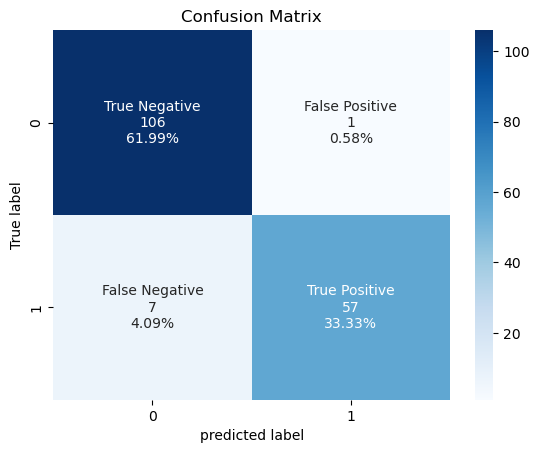

[[106   1]
 [  7  57]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

weighted_f1_score :  95.27039157755293


In [57]:
model_1 = KNeighborsClassifier(n_neighbors=knn_neighbors, weights=knn_weights, metric=knn_metric)
algorithm(model_1, X_train, y_train, X_test, y_test, Accuracy)

### 2. Logistic Regression

In [58]:
import warnings
warnings.filterwarnings('ignore')

param_grid = [
    {'solver': ['lbfgs'], 'penalty': ['l2', None], 'C': [0.01,0.1,1,10,100], 'max_iter':[100,200,500]},
    {'solver': ['liblinear'], 'penalty': ['l1','l2'], 'C': [0.01,0.1,1,10,100], 'max_iter':[100,200,500]},
    {'solver': ['saga'], 'penalty': ['l1','l2','elasticnet', None], 
     'C': [0.01,0.1,1,10,100], 'max_iter':[100,200,500],
     'l1_ratio': [0.2, 0.5, 0.8]}  # Chỉ dùng khi penalty='elasticnet'
]

# verbose=1: Hiển thị quá trình tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'), verbose=1)
grid_search.fit(X_train, y_train)

# Lấy kết quả tốt nhất
best_model = grid_search.best_estimator_
LR_C = grid_search.best_params_.get('C')
LR_penalty = grid_search.best_params_.get('penalty')
LR_solver = grid_search.best_params_.get('solver')
LR_max_iter = grid_search.best_params_.get('max_iter')
print("Best Parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Sử dụng tham số tốt nhất để huấn luyện lại mô hình
best_LR_model = grid_search.best_estimator_
y_pred_optimized = best_LR_model.predict(X_test)

# Đánh giá mô hình tối ưu
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated score: 0.992413552315513

Confusion Matrix (Optimized):
[[106   1]
 [  6  58]]

Classification Report (Optimized):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



confusion matrix


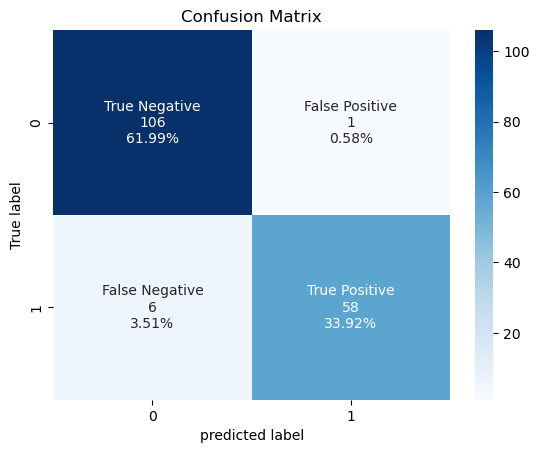

[[106   1]
 [  6  58]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

weighted_f1_score :  95.86996038189173


In [59]:
# LogisticRegression(tham số mặc định): C = 1.0, penalty = 'l2', solver = 'lbfgs', max_iter = 100
model_2 = LogisticRegression(C = LR_C, penalty = LR_penalty, solver = LR_solver, max_iter = LR_max_iter)
algorithm(model_2, X_train, y_train, X_test, y_test, Accuracy)

## 3. SVM

In [75]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'] #thêm 'linear', 'poly', 'sigmoid' nếu muốn thử các kernel khác 
}

# Tìm kiếm tham số tối ưu
# f1 ở đây cụ thể là weighted avg f1-score đúng không ? 
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted')) # cv = 5 tức là k-fold ở đây k = 5
grid_search.fit(X_train, y_train)

# Kết quả
print("Best Parameters:", grid_search.best_params_)
svm_C = grid_search.best_params_.get('C')
svm_gamma = grid_search.best_params_.get('gamma')
svm_kernel = grid_search.best_params_.get('kernel')

print(svm_C, svm_gamma, svm_kernel)

print("Best cross-validated score:", grid_search.best_score_)
# Sử dụng tham số tốt nhất để huấn luyện lại mô hình
best_svm_model = grid_search.best_estimator_
y_pred_optimized = best_svm_model.predict(X_test)

# Đánh giá mô hình tối ưu
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
10 0.01 rbf
Best cross-validated score: 0.9924097710477223

Confusion Matrix (Optimized):
[[106   1]
 [  6  58]]

Classification Report (Optimized):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



rbf
10
0.01
confusion matrix


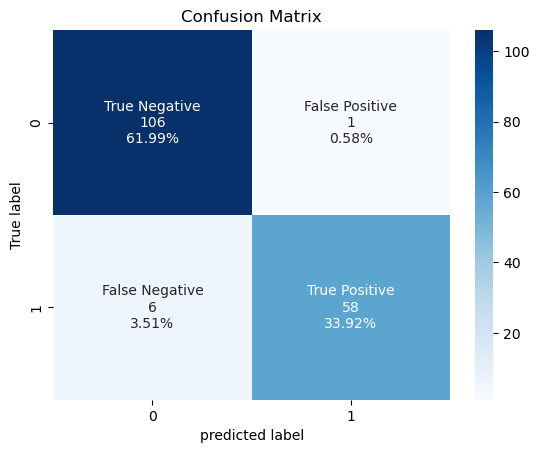

[[106   1]
 [  6  58]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

weighted_f1_score :  95.86996038189173


In [76]:
model_3 = SVC(kernel=svm_kernel, C=svm_C, gamma=svm_gamma, random_state=30, probability=True)
print(model_3.kernel)
print(model_3.C)
print(model_3.gamma)
algorithm(model_3, X_train, y_train, X_test, y_test, Accuracy)

## 4. Naive Bayes

In [62]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Giá trị var_smoothing cho GaussianNB
}

# Tìm kiếm tham số tối ưu
# Với scoring=make_scorer(f1_score, average='weighted'): Sử dụng weighted average F1-score.
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'))  # cv = 5 tức là k-fold ở đây k = 5
grid_search.fit(X_train, y_train)

# Kết quả
print("Best Parameters:", grid_search.best_params_)
NB_var_smoothing = grid_search.best_params_.get('var_smoothing')
print("Best cross-validated score:", grid_search.best_score_)

# Sử dụng tham số tốt nhất để huấn luyện lại mô hình
best_NB_model = grid_search.best_estimator_
y_pred_optimized = best_NB_model.predict(X_test)

# Đánh giá mô hình tối ưu
print("\nConfusion Matrix (Optimized):")
print(confusion_matrix(y_test, y_pred_optimized))

print("\nClassification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized))

Best Parameters: {'var_smoothing': 1e-09}
Best cross-validated score: 0.9346466341338482

Confusion Matrix (Optimized):
[[105   2]
 [ 10  54]]

Classification Report (Optimized):
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       107
           1       0.96      0.84      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



confusion matrix


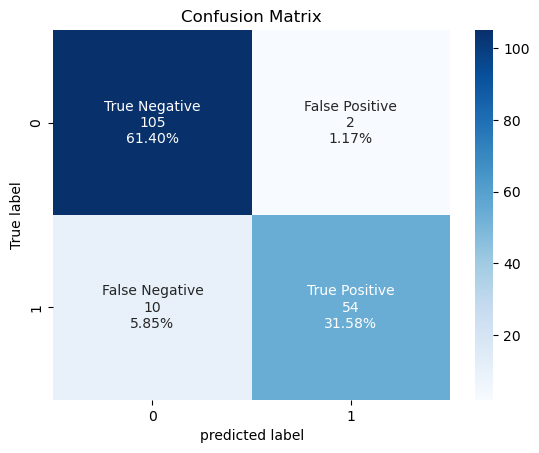

[[105   2]
 [ 10  54]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       107
           1       0.96      0.84      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171

weighted_f1_score :  92.8749802434013


In [63]:
model_4 = GaussianNB(var_smoothing=NB_var_smoothing)
algorithm(model_4, X_train, y_train, X_test, y_test, Accuracy)

## 5. Random Forest

In [64]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'oob_score': [True, False],   # oob_score chỉ có tác dụng nếu bootstrap=True
    'class_weight': ['balanced', 'balanced_subsample']
}

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring=make_scorer(f1_score, average='weighted'), n_jobs=1)

# Huấn luyện GridSearchCV trên dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

# Kết quả
print("Best parameters found: ", grid_search.best_params_)
RF_bootstrap = grid_search.best_params_['bootstrap']
RF_class_weight = grid_search.best_params_['class_weight']
RF_max_depth = grid_search.best_params_['max_depth']
RF_max_features = grid_search.best_params_['max_features']
RF_n_estimators = grid_search.best_params_['n_estimators']
RF_oob_score = grid_search.best_params_['oob_score']

print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200, 'oob_score': False}
Best cross-validation score:  0.974891177403368


confusion matrix


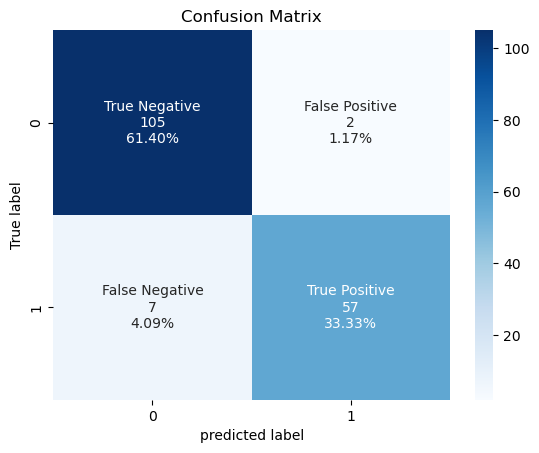

[[105   2]
 [  7  57]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       107
           1       0.97      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

weighted_f1_score :  94.68994906243223


In [65]:
model_5 = RandomForestClassifier(
    bootstrap=RF_bootstrap,
    class_weight=RF_class_weight,
    max_depth=RF_max_depth,
    max_features=RF_max_features,
    n_estimators=RF_n_estimators,
    oob_score=RF_oob_score
)

algorithm(model_5, X_train, y_train, X_test, y_test, Accuracy)

In [66]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [67]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import warnings

# Tắt các cảnh báo (nếu có)
warnings.filterwarnings('ignore')

print("Đang chuẩn bị để Finetune XGBoost...")

# 1. Khởi tạo mô hình XGBoost cơ sở
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 2. Định nghĩa "lưới" tham số (param_grid)
# Đây là các giá trị chúng ta muốn thử
# LƯU Ý: Lưới càng lớn, chạy càng lâu
param_grid_xgb = {
    'n_estimators': [100, 200, 300],       # Số lượng cây
    'learning_rate': [0.01, 0.05, 0.1],    # Tốc độ học
    'max_depth': [3, 5, 7],                # Độ sâu tối đa của cây
    'subsample': [0.8, 1.0],               # Tỷ lệ mẫu dùng để huấn luyện mỗi cây
    'colsample_bytree': [0.8, 1.0]         # Tỷ lệ features dùng cho mỗi cây
}
# Tổng số tổ hợp: 3 * 3 * 3 * 2 * 2 = 108 tổ hợp
# 108 tổ hợp * 5 (cv=5) = 540 lần huấn luyện mô hình. Sẽ mất chút thời gian.

# 3. Khởi tạo GridSearchCV
# scoring='weighted_f1' -> Mục tiêu là tối ưu F1-score
# cv=5 -> Dùng 5-fold cross-validation
# n_jobs=-1 -> Dùng tất cả các nhân CPU để chạy song song (nhanh hơn)
# verbose=2 -> Hiển thị log để bạn biết nó đang chạy
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='f1_weighted', 
    cv=5,
    n_jobs=-1,
    verbose=2
)

print("Bắt đầu chạy GridSearchCV... (Việc này sẽ mất vài phút)")
# 4. Huấn luyện!
# Dùng X_train (chưa scale)
grid_search_xgb.fit(X_train, y_train)

print("\n--- HOÀN TẤT TINH CHỈNH ---")

# 5. In ra kết quả
print(f"Tham số tốt nhất tìm được: {grid_search_xgb.best_params_}")
print(f"Điểm F1-score (cross-validated) tốt nhất: {grid_search_xgb.best_score_:.4f}")

# 6. Lấy ra mô hình tốt nhất
best_xgb_model = grid_search_xgb.best_estimator_

# 7. Đánh giá mô hình TỐT NHẤT này trên tập TEST
print("\n--- Đánh giá mô hình TỐT NHẤT trên tập Test ---")
y_pred_best = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print(f"Accuracy trên tập Test: {accuracy_score(y_test, y_pred_best):.4f}")

# Gợi ý:
# Bây giờ bạn có thể dùng 'best_xgb_model' để chạy lại hàm 'algorithm' 
# và thêm nó vào biểu đồ so sánh cuối cùng.
# Ví dụ:
# Algorithm.append("XGBoost_Tuned")
# Accuracy.append(tính_f1_score_trên_test)

Đang chuẩn bị để Finetune XGBoost...
Bắt đầu chạy GridSearchCV... (Việc này sẽ mất vài phút)
Fitting 5 folds for each of 108 candidates, totalling 540 fits


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100,

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100,

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estima

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimato

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=20

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200,

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300,

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [18:17:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


Đang chạy XGBClassifier (SOTA)...
confusion matrix


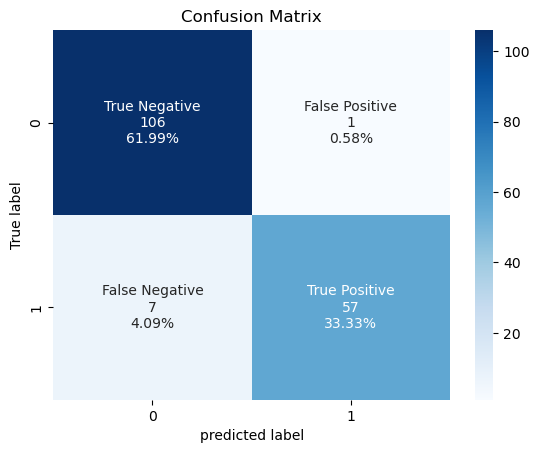

[[106   1]
 [  7  57]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

weighted_f1_score :  95.27039157755293
Hoàn tất!


In [68]:
from xgboost import XGBClassifier

print("\nĐang chạy XGBClassifier (SOTA)...")

# Khởi tạo mô hình
# 'use_label_encoder=False' và 'eval_metric='logloss'' là để tắt các cảnh báo
model_xgb = XGBClassifier(
    n_estimators=100,      # Số lượng "cây"
    learning_rate=0.1,     # Tốc độ học
    max_depth=5,           # Độ sâu tối đa của cây
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# QUAN TRỌNG:
# Chúng ta dùng X_train (chưa scale) vì XGBoost là mô hình dựa trên cây,
# nó không nhạy cảm với thang đo của dữ liệu.
# Điều này cũng áp dụng cho X_test.
algorithm(model_xgb, X_train, y_train, X_test, y_test, Accuracy)

print("Hoàn tất!")

Định nghĩa lại các mô hình con...
Khởi tạo StackingClassifier MỚI...

Đang chạy StackingClassifier trên dữ liệu RFE (10 features)...
confusion matrix


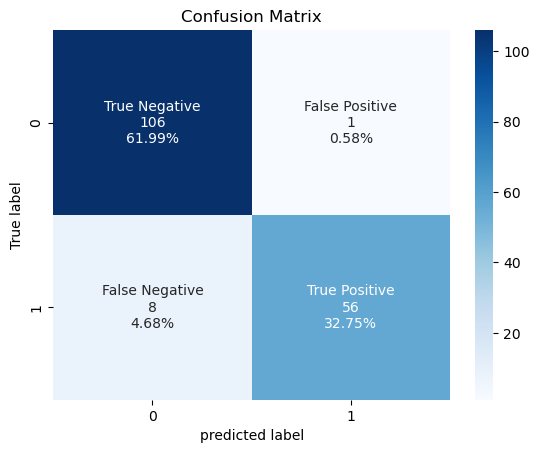

[[106   1]
 [  8  56]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       107
           1       0.98      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

weighted_f1_score :  94.66795518019835
Hoàn tất!


Exception ignored in: <function ResourceTracker.__del__ at 0x105011e40>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102709e40>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10256de40>
Traceback (most recent call last

In [78]:
# --- Đây là cell bạn cần CHẠY LẠI ---
# (Sau khi đã chạy cell RFE và có X_train_rfe, X_test_rfe)

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# ... (và các import khác của bạn)

print("Định nghĩa lại các mô hình con...")
# (Bạn có thể cần định nghĩa lại clf1, clf2, ... 
# nếu chúng cũng bị "fit" ở đâu đó, nhưng thường là không cần)

# Định nghĩa danh sách các mô hình con (estimators)
estimators = [
    ('kNN', Pipeline([('scaler', StandardScaler()), ('knn', model_1)])),
    ('LR', Pipeline([('scaler', StandardScaler()), ('lr', model_2)])),
    ('SVM', Pipeline([('scaler', StandardScaler()), ('svm', model_2)])),
    ('RF', clf5)  # RF không cần scaler
]

print("Khởi tạo StackingClassifier MỚI...")
# Dòng này tạo ra một mô hình MỚI, CHƯA ĐƯỢC HUẤN LUYỆN
stack_model = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    stack_method='predict_proba',
    cv=5,
    n_jobs=-1
)

print("\nĐang chạy StackingClassifier trên dữ liệu RFE (10 features)...")

# Bây giờ, huấn luyện mô hình MỚI này trên dữ liệu RFE
algorithm(stack_model, X_train_rfe, y_train, X_test_rfe, y_test, Accuracy) 

print("Hoàn tất!")

### 6*. Ensemble: Voting Classifier

confusion matrix


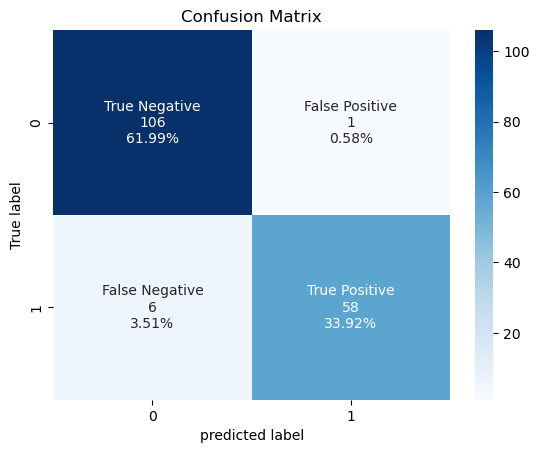

[[106   1]
 [  6  58]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.91      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

weighted_f1_score :  95.86996038189173


In [27]:
# Chỉ dùng 2 mô hình tốt nhất
clf2 = LogisticRegression(random_state=42)
clf3 = SVC(probability=True, random_state=42) # Nhớ bật probability=True

model_vote_best_2 = VotingClassifier(
    estimators=[
        ('LR', clf2), 
        ('SVM', clf3)
    ],
    voting='soft' # 'soft' voting gần như luôn tốt hơn
)

# Chạy lại đánh giá
algorithm(model_vote_best_2, X_train, y_train, X_test, y_test, Accuracy)

In [28]:
print(Accuracy)

[95.27039157755293, 95.86996038189173, 95.86996038189173, 92.8749802434013, 94.68994906243223, 95.27039157755293, 95.86996038189173, 95.86996038189173]


In [36]:
# Thêm 2 dòng này vào để kiểm tra
print(f"Số lượng tên mô hình: {len(Algorithm)}")
print(f"Số lượng điểm số: {len(Accuracy)}")
print("Danh sách tên:", Algorithm)
print("Danh sách điểm:", Accuracy)

Số lượng tên mô hình: 8
Số lượng điểm số: 8
Danh sách tên: ['KNeighborsClassifier', 'LogisticRegression', 'SVM', 'Naive Bayes', 'RandomForest', 'VotingClassifier', 'Stacking', 'XGBoost']
Danh sách điểm: [95.27039157755293, 95.86996038189173, 95.86996038189173, 92.8749802434013, 94.68994906243223, 95.27039157755293, 95.86996038189173, 95.86996038189173]


In [37]:
score = pd.DataFrame({'Algorithm': Algorithm, 'Weighted_f1': Accuracy })
score

Algorithm  Weighted_f1
0  KNeighborsClassifier    95.270392
1    LogisticRegression    95.869960
2                   SVM    95.869960
3           Naive Bayes    92.874980
4          RandomForest    94.689949
5      VotingClassifier    95.270392
6              Stacking    95.869960
7               XGBoost    95.869960

In [1]:
import matplotlib.pyplot as plt

# Tạo hình vẽ với kích thước lớn hơn
fig = plt.figure(figsize=(20, 12))

# --- ĐỀ XUẤT: DÙNG BIỂU ĐỒ CỘT (BAR CHART) ---
# Biểu đồ cột tốt hơn để so sánh các mô hình riêng biệt
plt.bar(score.Algorithm, score.Weighted_f1, 
        color='deepskyblue', 
        edgecolor='black',
        width=0.6) # Thêm màu và viền cho rõ

# Thêm lưới (grid) cho trục Y
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Đặt nhãn cho trục X và Y (bỏ bớt \n cho gọn)
plt.xlabel('Model', fontsize=20, fontweight='bold')
plt.ylabel('Weighted F1', fontsize=20, fontweight='bold')

# Thêm tiêu đề cho biểu đồ
plt.title('Performance of Different Algorithms', fontsize=22, fontweight='bold')

# "Zoom" vào vùng điểm số cao để thấy rõ sự khác biệt
# Bạn có thể điều chỉnh 0.92 và 0.965 tùy theo F1 min/max của bạn
min_f1 = score.Weighted_f1.min()
max_f1 = score.Weighted_f1.max()
plt.ylim(min_f1 * 0.99, max_f1 * 1.005) 

# Tùy chỉnh các tick (vạch) trên trục cho dễ đọc
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Hiển thị biểu đồ
plt.show()

NameError: name 'score' is not defined

<Figure size 2000x1200 with 0 Axes>